<a href="https://colab.research.google.com/github/Luizaaaa/RedesNeurais/blob/main/HW4_Luiza_Stringhini_Linhares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10

In [ ]:
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
model = tf.keras.models.Sequential()

# Input Layer


model.add(tf.keras.layers.Conv2D(input_shape=(32,32,3), filters=32, kernel_size=(2,2), padding='same', strides=(2,2)))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))


model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))


model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))


model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='softmax'))

opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        416       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                  

In [ ]:
history = model.fit(X_train, Y_train, batch_size=100, validation_split=0.1, epochs=8)


Epoch 1/8
450/450 [==============================] - 20s 16ms/step - loss: 2.2771 - accuracy: 0.1475 - val_loss: 1.7664 - val_accuracy: 0.2894
Epoch 2/8
450/450 [==============================] - 7s 16ms/step - loss: 1.6042 - accuracy: 0.3767 - val_loss: 1.4936 - val_accuracy: 0.4436
Epoch 3/8
450/450 [==============================] - 7s 15ms/step - loss: 1.2417 - accuracy: 0.5496 - val_loss: 1.1100 - val_accuracy: 0.5988
Epoch 4/8
450/450 [==============================] - 7s 15ms/step - loss: 1.0267 - accuracy: 0.6358 - val_loss: 1.0362 - val_accuracy: 0.6396
Epoch 5/8
450/450 [==============================] - 7s 15ms/step - loss: 0.8632 - accuracy: 0.6988 - val_loss: 0.8810 - val_accuracy: 0.6998
Epoch 6/8
450/450 [==============================] - 7s 15ms/step - loss: 0.7452 - accuracy: 0.7419 - val_loss: 0.8664 - val_accuracy: 0.7072
Epoch 7/8
450/450 [==============================] - 7s 15ms/step - loss: 0.6382 - accuracy: 0.7794 - val_loss: 0.8719 - val_accuracy: 0.7228
Epoch

In [ ]:
test_loss, test_accuracy = model.evaluate(X_train, Y_train, batch_size=100)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.9095 - accuracy: 0.7145


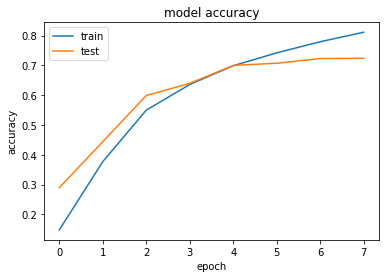

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()